In [165]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [166]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [167]:
df.shape

(103, 7)

# Data Cleaning

In [168]:
#we have to remove . with , as a data cannot have more than 1 .

# we use replace function

df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [169]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [228]:
# there is gap in bn the words and () so we will replace it and inplace true to make the changes permanent
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg / Hectare)'},inplace=True)

In [171]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [172]:
#check if there is any null value

df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [173]:
# we have onlyh 1 null value in last 2 column with the single row so we can remove that ro

df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [174]:
df=df.dropna().reset_index()

In [175]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [176]:
df.drop(['Unnamed: 0','index'] , axis=1 ,inplace=True)

In [177]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [229]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)     object
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
Production per Person(Kg)    float64
dtype: object

In [230]:
# to do any mathematical operation it should be changed to floating number -data type correction
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg / Hectare)']=df['Yield(Kg / Hectare)'].astype(float)

In [231]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
Production per Person(Kg)    float64
dtype: object

In [181]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
Production per Person(Kg)    101
dtype: int64

# ANALYSIS

## Univariate Analysis 

In [182]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5,3668.531
1,India,Asia,348448000.0,260721,4950000.0,70393.5,260721.000
2,China,Asia,123059739.0,88287,1675215.0,73459.1,88287.000
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2,1264.303
4,Pakistan,Asia,65450704.0,324219,1130820.0,57879.0,324219.000


### How many countries produce sugarcane from each continent?

In [183]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

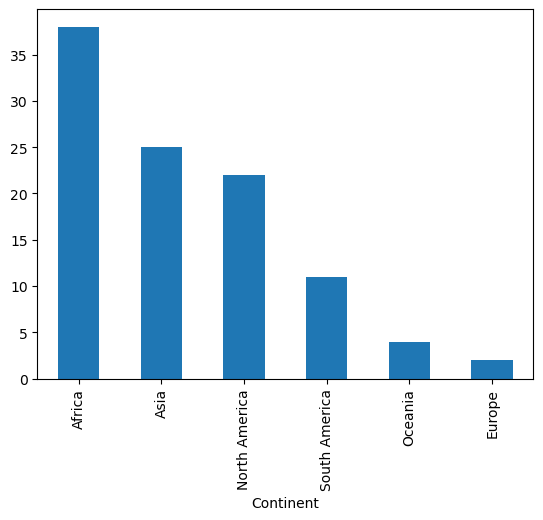

In [184]:
df['Continent'].value_counts().plot(kind='bar')

C:\Users\pooja\AppData\Local\Temp\ipykernel_15388\622055804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\pooja\AppData\Local\Temp\ipykernel_15388\622055804.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C:\Users\pooja\

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Density'>

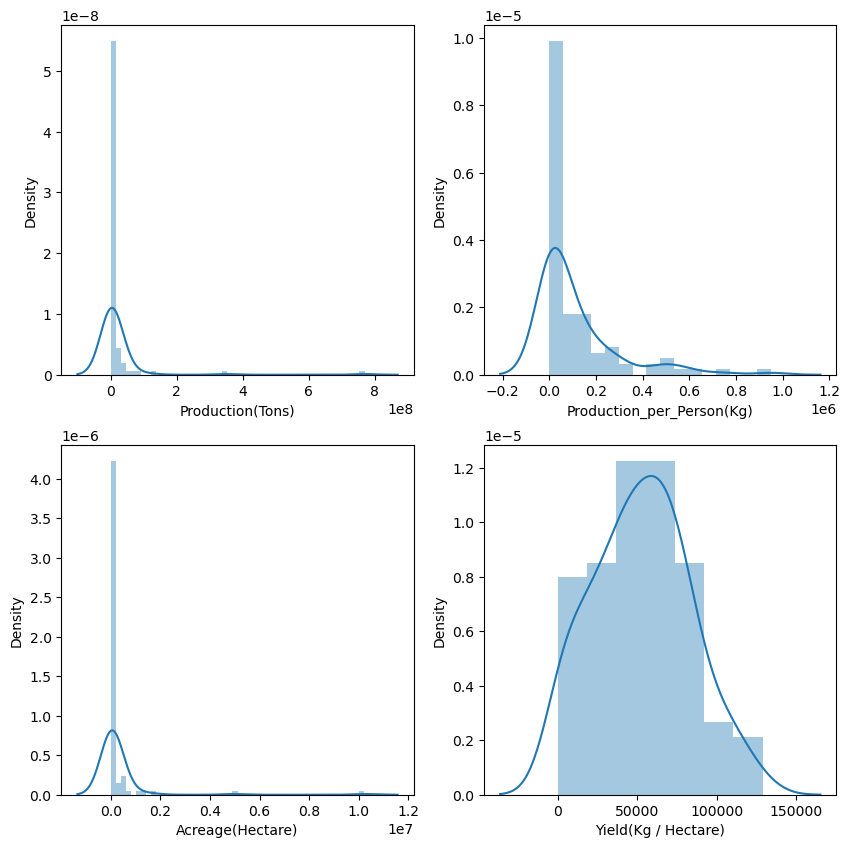

In [185]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg / Hectare)'])

<Axes: >

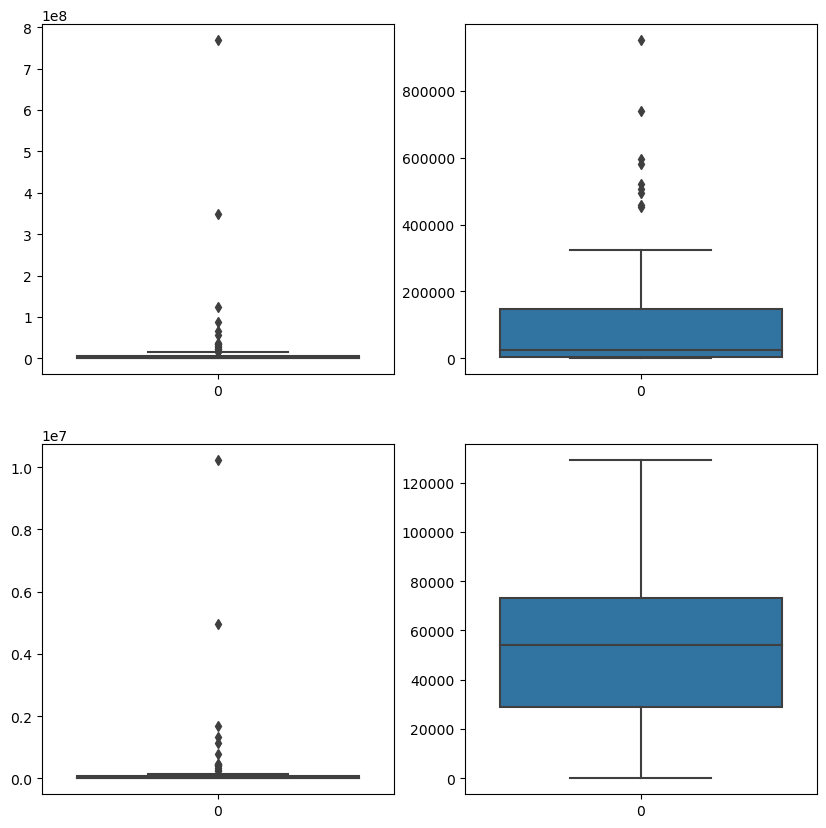

In [186]:
# to analyse outliers 

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg / Hectare)'])

In [187]:
df.describe()

,Production(Tons),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
count,1.020000e+02,1.020000e+02,102.000000,102.000000
mean,1.850372e+07,2.498981e+05,52628.078431,112952.435755
std,8.419149e+07,1.137003e+06,30504.676683,176651.341929
min,1.000000e+00,0.000000e+00,10.000000,0.000000
25%,6.251875e+04,1.104000e+03,29072.025000,3671.910000
50%,1.440044e+06,1.655800e+04,54108.950000,25572.500000
75%,6.426824e+06,8.047400e+04,73282.700000,146384.750000
max,7.686784e+08,1.022620e+07,129049.300000,951087.000000


## Bivariate analysis

In [188]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5,3668.531
1,India,Asia,348448000.0,260721,4950000.0,70393.5,260721.000
2,China,Asia,123059739.0,88287,1675215.0,73459.1,88287.000
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2,1264.303
4,Pakistan,Asia,65450704.0,324219,1130820.0,57879.0,324219.000


#### Which country produces maximum sugarcane?

In [189]:
df_new=df[['Country','Production(Tons)']].set_index("Country")

In [190]:
df_new.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [191]:
df_new['Production(Tons)_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [192]:
df_new.head()

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production(Tons)_percent'>

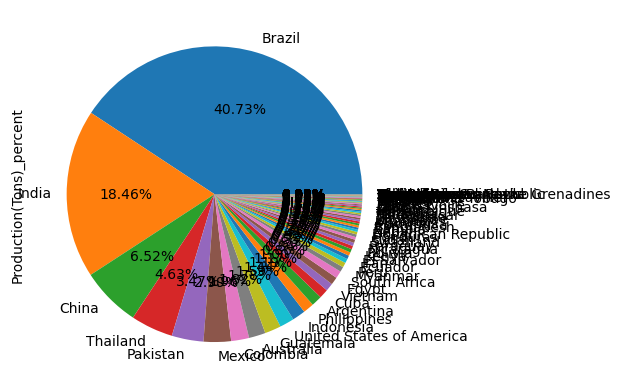

In [200]:
df_new['Production(Tons)_percent'].plot(kind='pie' , autopct='%0.2f%%')

<Axes: xlabel='Country'>

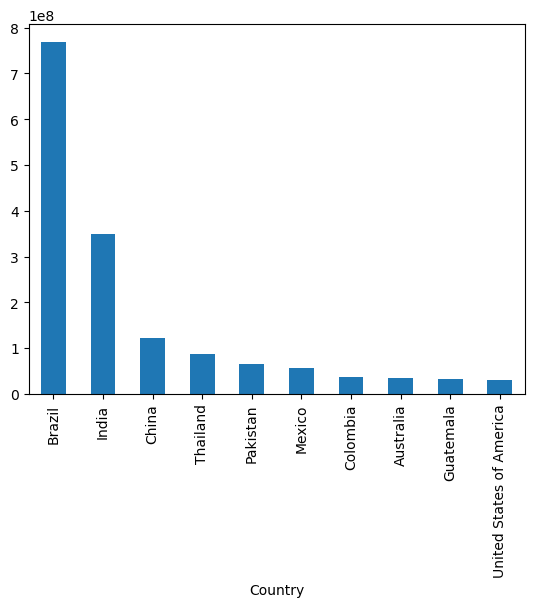

In [194]:
df_new['Production(Tons)'].head(10).plot(kind='bar')

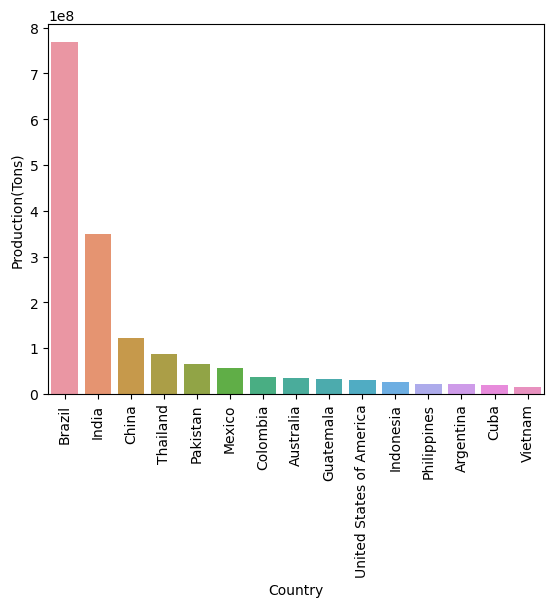

In [195]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90) # to rotate the x-axis name
plt.show()

### Which country has highest land?

In [196]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5,3668.531
1,India,Asia,348448000.0,260721,4950000.0,70393.5,260721.000
2,China,Asia,123059739.0,88287,1675215.0,73459.1,88287.000
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2,1264.303
4,Pakistan,Asia,65450704.0,324219,1130820.0,57879.0,324219.000
5,Mexico,North America,56446821.0,452524,781054.0,7227.0,452524.000
6,Colombia,South America,36951213.0,740075,416626.0,88691.5,740075.000
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1,1373.406
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3,1938.114
9,United States of America,North America,29926210.0,91304,37053.0,80766.0,91304.000


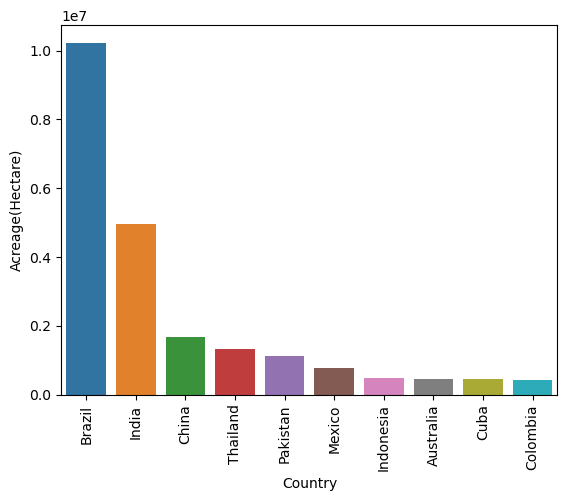

In [197]:
df_acr=df.sort_values('Acreage(Hectare)' , ascending=False) # to get top contrries ascending order
ax = sns.barplot(data = df_acr.head(10),  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90) # to rotate the x-axis name
plt.show()

### Which country has highest yield per hectare?

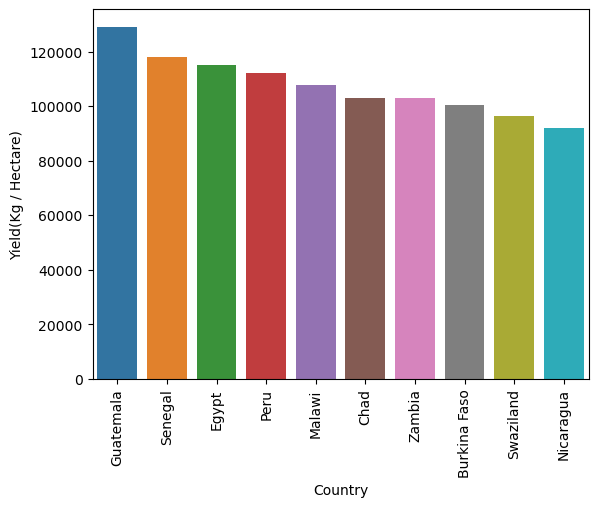

In [198]:
df_yei=df.sort_values('Yield(Kg / Hectare)' , ascending=False).head(10) # to get top contrries ascending order
ax = sns.barplot(data = df_yei,  x= "Country", y = "Yield(Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90) # to rotate the x-axis name
plt.show()

### Which country has highest Production per Person?

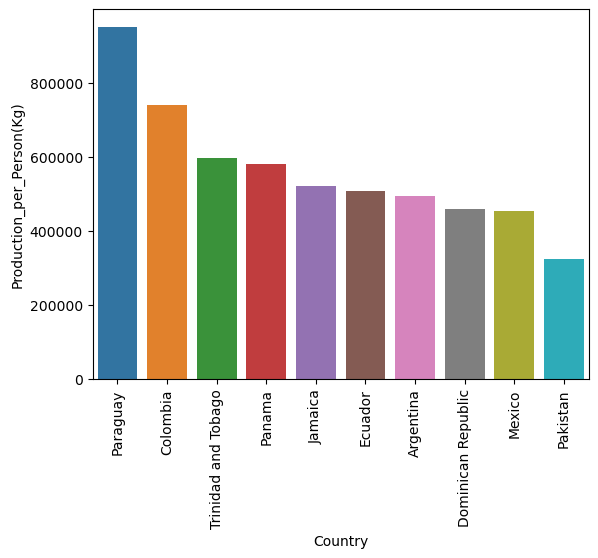

In [233]:
df_pro=df.sort_values('Production_per_Person(Kg)', ascending=False).head(10)
# to get top contrries ascending order
ax = sns.barplot(data = df_pro,  x= "Country", y = "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90) # to rotate the x-axis name
plt.show()

In [227]:
df_pro.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)     object
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
Production per Person(Kg)    float64
dtype: object

## Correlation 

In [201]:
cor=df.copy()
cor.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5,3668.531
1,India,Asia,348448000.0,260721,4950000.0,70393.5,260721.000
2,China,Asia,123059739.0,88287,1675215.0,73459.1,88287.000
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2,1264.303
4,Pakistan,Asia,65450704.0,324219,1130820.0,57879.0,324219.000


In [202]:
cor.corr()

ValueError: could not convert string to float: 'Brazil'

This code selects only columns with numeric data types (float64 and int64) from your DataFrame cor, and then computes the correlation matrix. This way, non-numeric columns like the one containing the string 'Brazil' are excluded from the correlation computation.

In [203]:
numeric_df = cor.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Production(Tons),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
Production(Tons),1.000000,0.997550,0.132812,0.015000
Acreage(Hectare),0.997550,1.000000,0.113433,0.012557
Yield(Kg / Hectare),0.132812,0.113433,1.000000,0.017999
Production per Person(Kg),0.015000,0.012557,0.017999,1.000000


<Axes: >

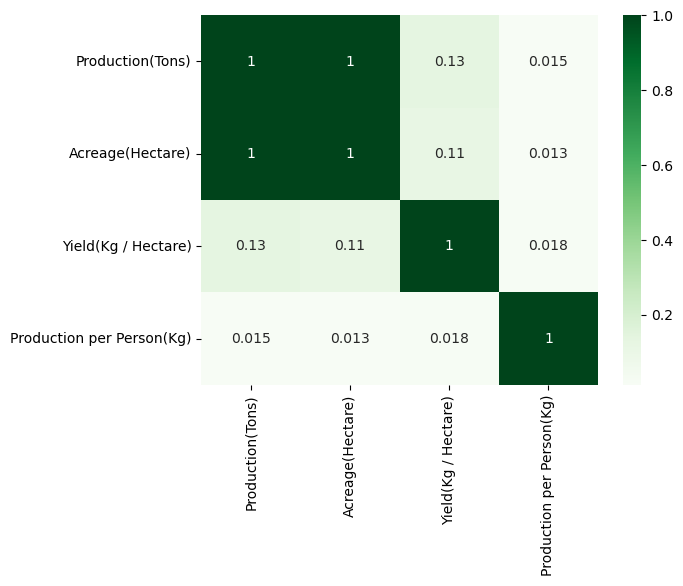

In [204]:
sns.heatmap(correlation_matrix, annot = True, cmap="Greens")

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

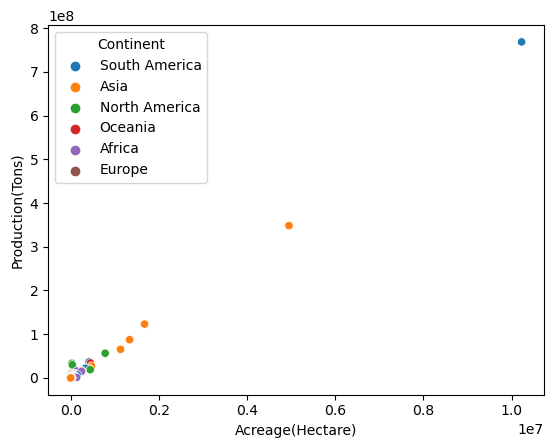

In [205]:
sns.scatterplot(data=df , x='Acreage(Hectare)' , y='Production(Tons)', hue='Continent')

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Production(Tons)'>

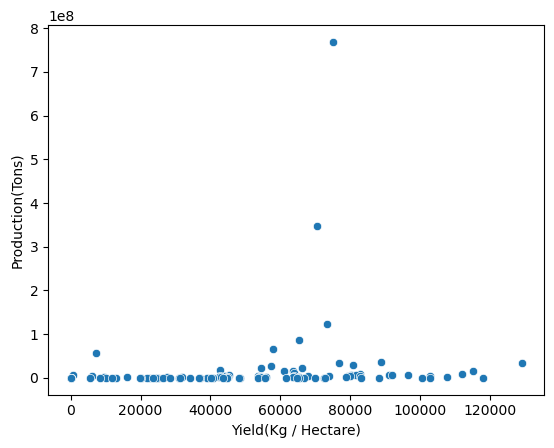

In [206]:
sns.scatterplot(data=df , x='Yield(Kg / Hectare)' , y='Production(Tons)')

## Analysis for Continent

In [207]:
df_continent=df.groupby('Continent').sum()

In [208]:
df_continent.drop('Country' , axis=1)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg)
Continent,,,,,
Africa,89681472.0,1616512611431392444816.2991354282537843002.994...,1439089.0,2142107.5,2332636.293
Asia,721930425.0,260721882871264.303324219102482102321723341937...,10608319.0,1171871.4,1857769.303
Europe,5823.0,5288,71.0,131870.9,536.000
North America,173995947.0,4525241938.114913041683.5281084.1111084.393594...,1581983.0,1082602.4,3796081.508
Oceania,36177574.0,1373.4061759.199254556,490909.0,162419.1,28593.605
South America,865588126.0,3668.53174007549423731476850751861118951087104...,11369236.0,677192.7,3505531.738


### Which continent produces maximum sugarcane?

In [209]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

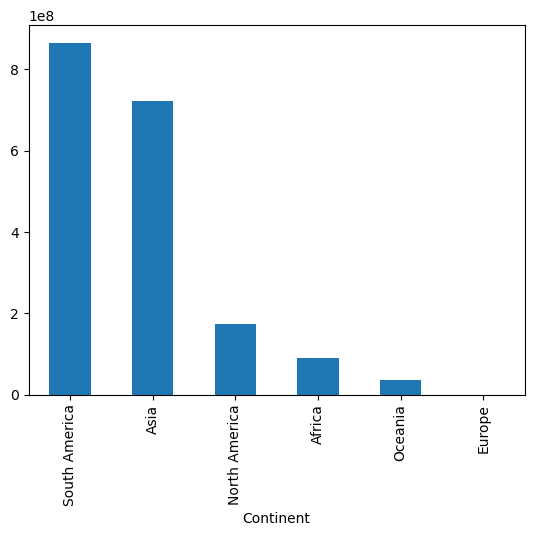

In [210]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Continent'>

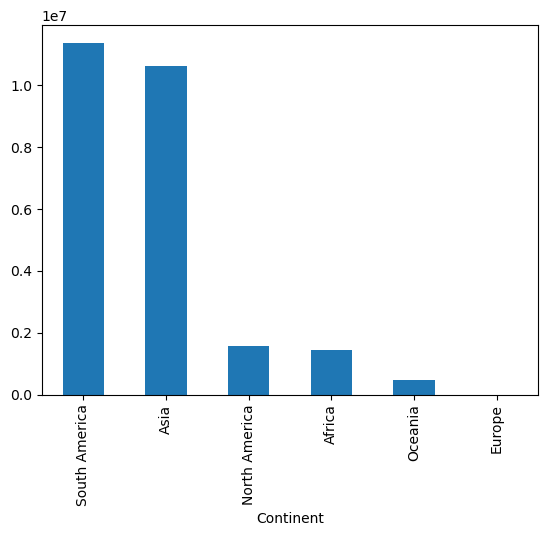

In [211]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

### Do number of countries in a Continent effects production of sugarcane?

In [212]:
df_continent['number_of_countries']=df.groupby('Continent').count()['Country']


In [213]:
df_continent.drop('Country' , axis=1)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg),number_of_countries
Continent,,,,,,
Africa,89681472.0,1616512611431392444816.2991354282537843002.994...,1439089.0,2142107.5,2332636.293,38
Asia,721930425.0,260721882871264.303324219102482102321723341937...,10608319.0,1171871.4,1857769.303,25
Europe,5823.0,5288,71.0,131870.9,536.000,2
North America,173995947.0,4525241938.114913041683.5281084.1111084.393594...,1581983.0,1082602.4,3796081.508,22
Oceania,36177574.0,1373.4061759.199254556,490909.0,162419.1,28593.605,4
South America,865588126.0,3668.53174007549423731476850751861118951087104...,11369236.0,677192.7,3505531.738,11


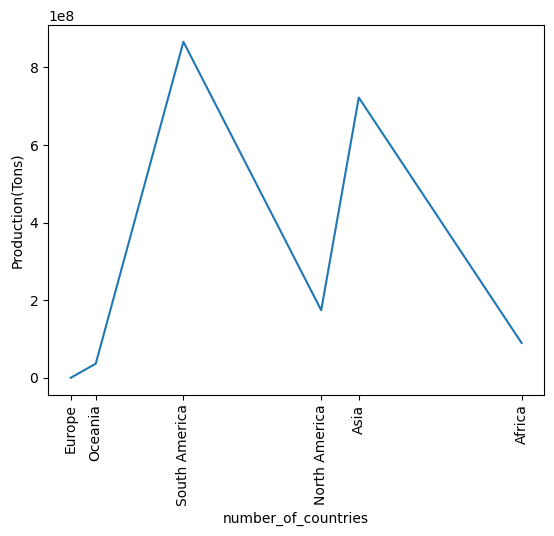

In [214]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

### Correlation for continent

In [215]:
numeric_df = df_continent.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Production(Tons),Acreage(Hectare),Yield(Kg / Hectare),Production per Person(Kg),number_of_countries
Production(Tons),1.000000,0.994897,0.091201,0.522211,0.109244
Acreage(Hectare),0.994897,1.000000,0.111166,0.463215,0.132817
Yield(Kg / Hectare),0.091201,0.111166,1.000000,0.542961,0.989712
Production per Person(Kg),0.522211,0.463215,0.542961,1.000000,0.540086
number_of_countries,0.109244,0.132817,0.989712,0.540086,1.000000


<Axes: >

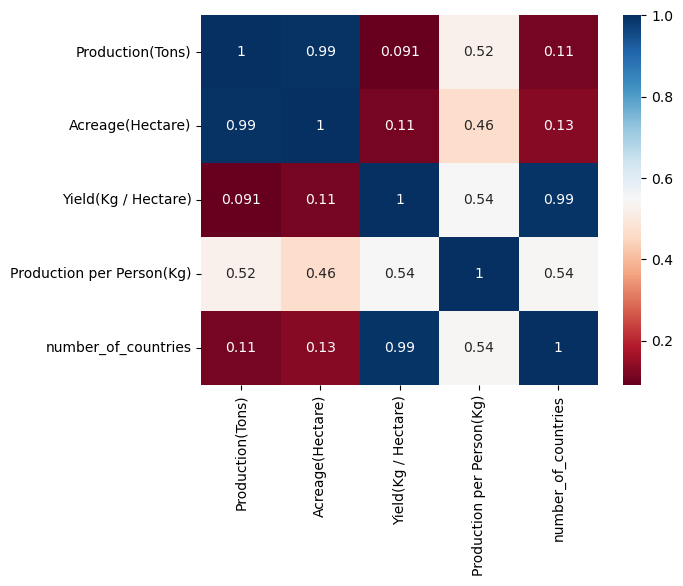

In [216]:
sns.heatmap(correlation_matrix ,annot=True , cmap='RdBu'  )

### Production distribution by continent

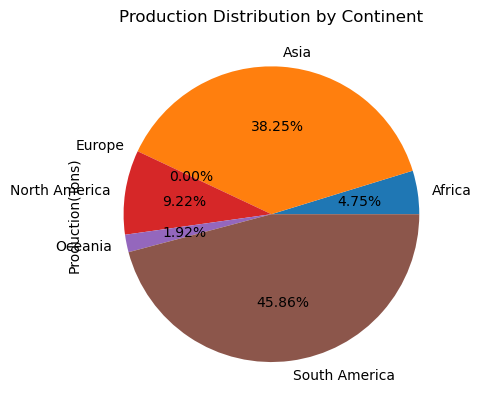

In [217]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

### Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

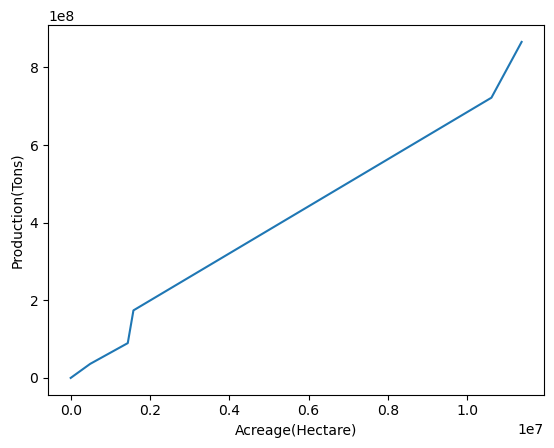

In [218]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )